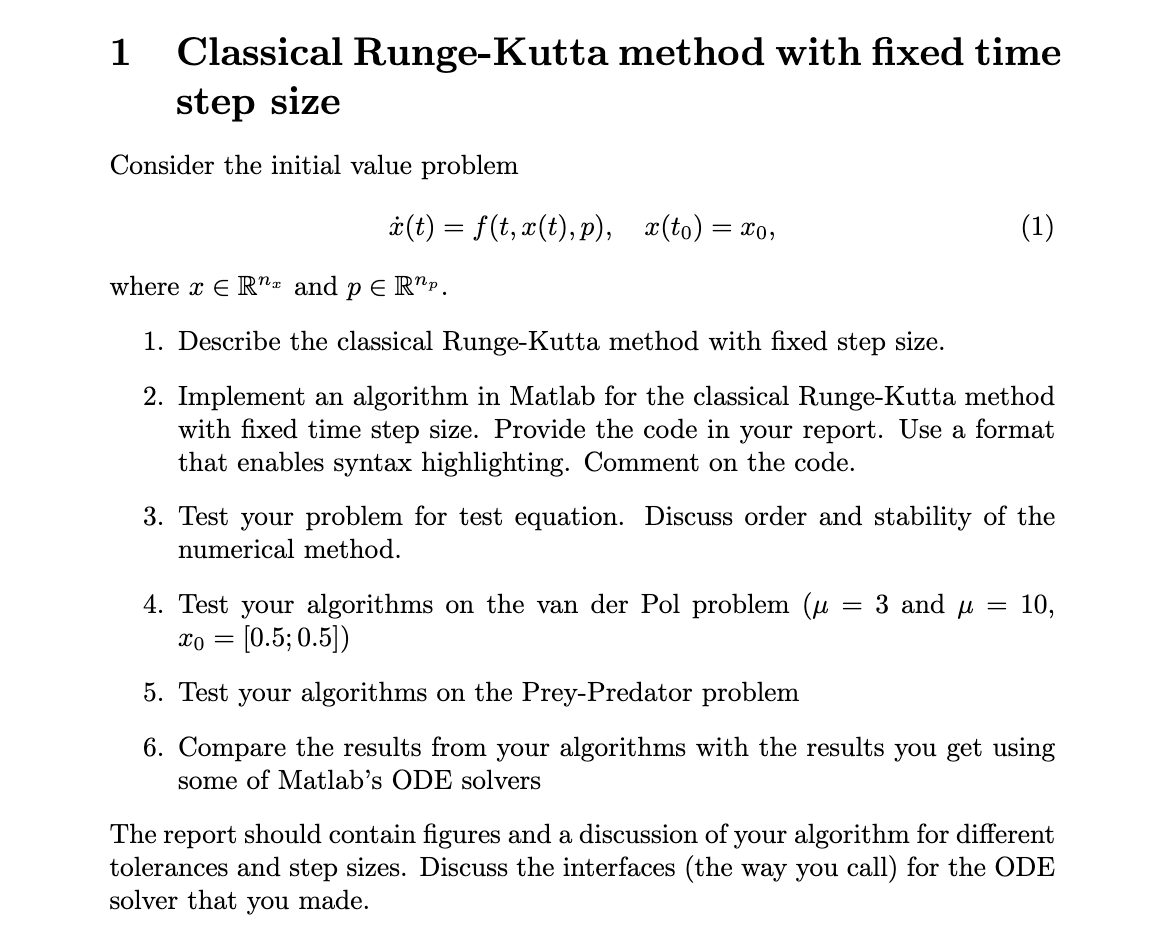

Exercise 1:

The classical Runga Kutta methods is a method.

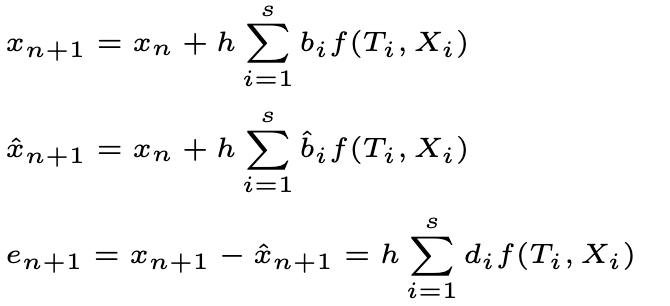

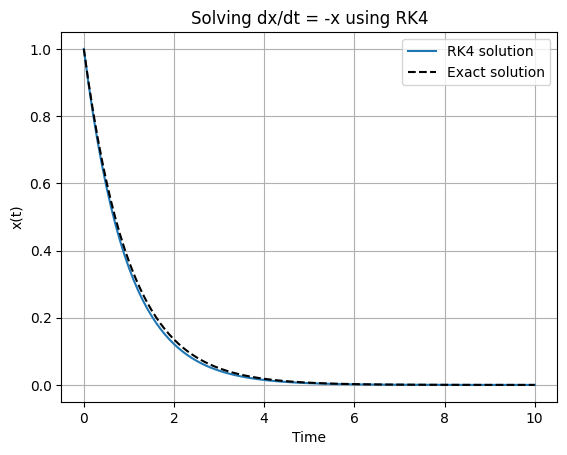

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_fixed_step(fun, t0, x0, h, N, A, b, c):
    x0 = np.array(x0)
    s = len(b) #constants find out in week 
    d = len(x0)

    Tout = np.zeros(N + 1)
    Xout = np.zeros((N + 1, d))

    t = t0
    x = x0.copy()


    Tout[0] = t
    Xout[0] = x


    for n in range(N):
        T = np.zeros(s)
        X = np.zeros((d, s))
        F = np.zeros((d, s))

        # Stage 1
        T[0] = t
        X[:, 0] = x
        F[:, 0] = fun(T[0], X[:, 0])

        # Stage 2 to s
        for i in range(1, s):
            T[i] = t + h * c[i]
            X[:, i] = x + h * F[:, :i] @ A[:i, i]
            F[:, i] = fun(T[i], X[:, i])

        # Next step
        t = t + h
        x = x + h * F @ b

        
        Tout[n + 1] = t
        Xout[n + 1] = x


    return Tout, Xout

# Example: dx/dt = -x
def f(t, x):
    return -x

# Butcher tableau for classic RK4
A = np.array([
    [0,   0,   0, 0],
    [0.5, 0,   0, 0],
    [0,   0.5, 0, 0],
    [0,   0,   1, 0]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1.0])

# Initial conditions and settings
t0 = 0
x0 = [1.0]
h = 0.1
N = 100

# Run the solver
Tout, Xout = runge_kutta_fixed_step(f, t0, x0, h, N, A, b, c)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='RK4 solution')
plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving dx/dt = -x using RK4')
plt.legend()
plt.grid()
plt.show()


Runge kutta fixed step with error estimate

[[0.00000000e+00]
 [1.65875000e-02]
 [1.50089920e-02]
 [1.35806988e-02]
 [1.22883256e-02]
 [1.11189378e-02]
 [1.00608319e-02]
 [9.10341796e-03]
 [8.23711395e-03]
 [7.45324959e-03]
 [6.74397973e-03]
 [6.10220576e-03]
 [5.52150460e-03]
 [4.99606442e-03]
 [4.52062644e-03]
 [4.09043233e-03]
 [3.70117656e-03]
 [3.34896335e-03]
 [3.03026762e-03]
 [2.74189978e-03]
 [2.48097374e-03]
 [2.24487808e-03]
 [2.03124987e-03]
 [1.83795105e-03]
 [1.66304704e-03]
 [1.50478732e-03]
 [1.36158800e-03]
 [1.23201588e-03]
 [1.11477417e-03]
 [1.00868947e-03]
 [9.12700060e-04]
 [8.25845241e-04]
 [7.47255743e-04]
 [6.76145018e-04]
 [6.11801368e-04]
 [5.53580820e-04]
 [5.00900686e-04]
 [4.53233724e-04]
 [4.10102870e-04]
 [3.71076455e-04]
 [3.35763892e-04]
 [3.03811761e-04]
 [2.74900274e-04]
 [2.48740077e-04]
 [2.25069349e-04]
 [2.03651187e-04]
 [1.84271231e-04]
 [1.66735520e-04]
 [1.50868551e-04]
 [1.36511523e-04]
 [1.23520745e-04]
 [1.11766202e-04]
 [1.01130251e-04]
 [9.15064434e-05]
 [8.27984614e-05]
 [7.491915

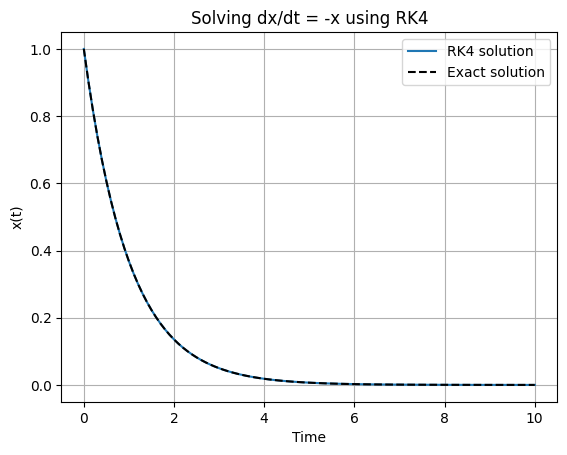

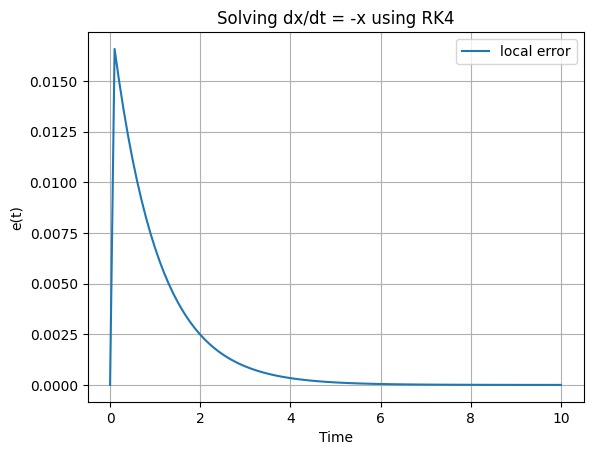

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_fixed_step(fun, t0, x0, h, N, A, b, bhat, c):
    x0 = np.array(x0)
    s = len(b)
    d = len(x0)

    Tout = np.zeros(N + 1)
    Xout = np.zeros((N + 1, d))
    E = np.zeros((N + 1, d))

    t = t0
    x = x0.copy()

    Tout[0] = t
    Xout[0] = x

    d_err = bhat - b  # Difference between b and bhat
 
    
    for n in range(N):
        T = np.zeros(s)
        X = np.zeros((d, s))
        F = np.zeros((d, s))



        # Stage 1
        T[0] = t
        X[:, 0] = x
        F[:, 0] = fun(T[0], X[:, 0])

        # Stage 2 to s
        for i in range(1, s):
            T[i] = t + h * c[i]
            X[:, i] = x + h * np.dot(F[:, :i], A[i, :i])
            F[:, i] = fun(T[i], X[:, i])
        

        # Compute full step
        x_new = x + h * np.dot(F, b)
        e = h * np.dot(F, d_err)  # Error estimation, we get an array out here

        # Update values
        t = t + h
        x = x_new

        Tout[n + 1] = t
        Xout[n + 1] = x
        E[n + 1] = np.abs(e)

    return Tout, Xout, E

# Example function: dx/dt = -x
def f(t, x):
    return -x

# Butcher tableau for RK4
A = np.array([
    [0,   0,   0, 0],
    [0.5, 0,   0, 0],
    [0,   0.5, 0, 0],
    [0,   0,   1, 0]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
bhat = np.array([1/6, 2/3, 1/3, 0])  # Define an alternative for error estimation (e.g., RK3)
c1 = np.array([0, 0.5, 0.5, 1.0])

# Initial conditions and settings
t0 = 0
x0 = [1.0]
h = 0.1
N = 100

# Run the solver
Tout, Xout, E = runge_kutta_fixed_step(f, t0, x0, h, N, A, b, bhat, c1)

print(E)
# Plot the result
plt.plot(Tout, Xout[:, 0], label='RK4 solution')
plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving dx/dt = -x using RK4')
plt.legend()
plt.grid()
plt.show()

# Plot the result
plt.plot(Tout, E, label='local error')
plt.xlabel('Time')
plt.ylabel('e(t)')
plt.title('Solving dx/dt = -x using RK4')
plt.legend()
plt.grid()
plt.show()


Testing it on vanderpol

In [84]:
# Van der Pol system
def vanderpol(t, x, mu=1.0):
    dxdt = x[1]
    dydt = mu * (1 - x[0]**2) * x[1] - x[0]
    return np.array([dxdt, dydt])

# Butcher tableau for classic RK4
A = np.array([
    [0,   0,   0, 0],
    [0.5, 0,   0, 0],
    [0,   0.5, 0, 0],
    [0,   0,   1, 0]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1.0])

# Initial conditions and parameters
t0 = 0
x0 = [2.0, 0.0]  # x and y
h = 0.01
N = 2000  # total steps (so 20 seconds of simulation)

# Run solver
Tout, Xout = runge_kutta_fixed_step(lambda t, x: vanderpol(t, x, mu=1.5), t0, x0, h, N, A, b, c)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(Tout, Xout[:, 0], label='x(t)')
plt.plot(Tout, Xout[:, 1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Van der Pol Oscillator - Time Series')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Xout[:, 0], Xout[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.grid()

plt.tight_layout()
plt.show()

TypeError: runge_kutta_fixed_step() missing 1 required positional argument: 'c'

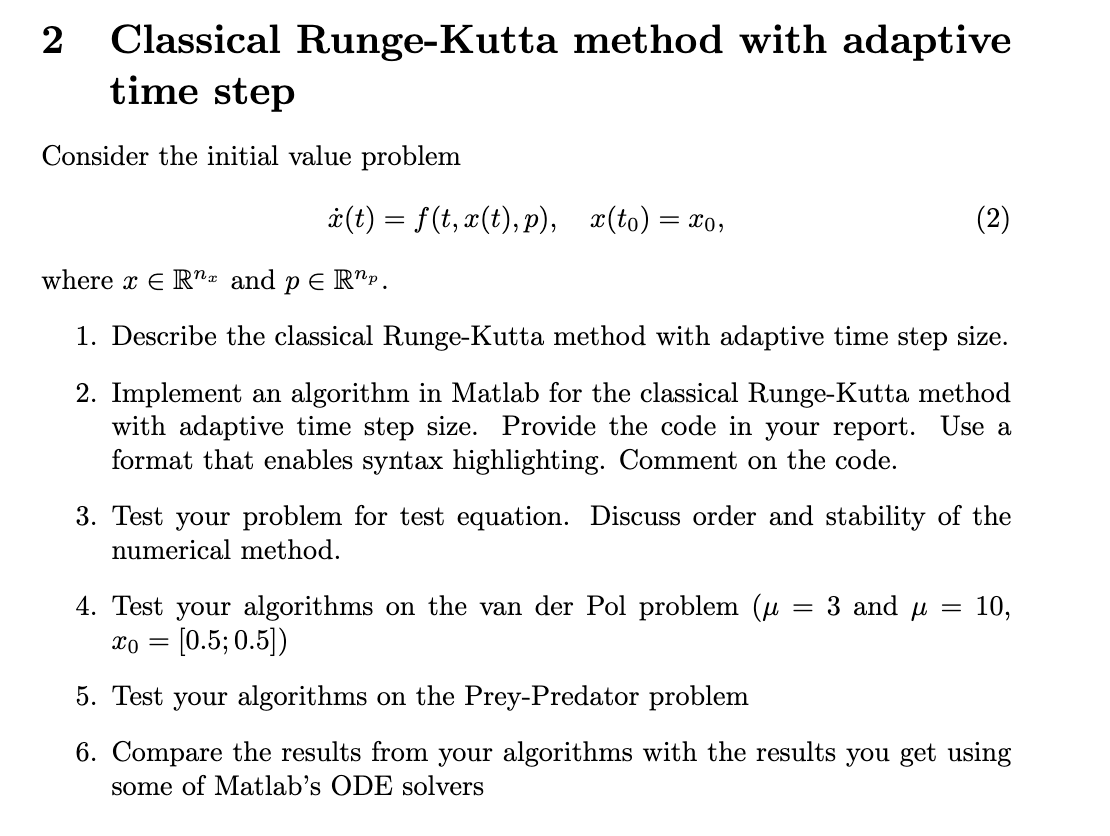

In [73]:
#classical runge kutta method with adaptive time step
import numpy as np


def ClassicalRungeKuttaStep(fun,t,x,f,h,*args):
    #det er vores egen
    

    h2 = 0.5*h      # Half the step size
    alpha = h/6     # Weight for F1, F4
    beta = h/3      # Weight for F2, F3

    x = np.array(x, dtype=float)  # Ensure x is a NumPy array
    t = np.array(t, dtype=float)  # Ensure x is a NumPy array
    f = np.array(f, dtype=float)  # Ensure x is a NumPy array

    T1=t
    X1=x
    F1=f

    # Half a step
    T2 = t+h2
    X2 = x+h2*F1 
    F2 = np.array(fun(T2,X2,*args))
    
    T3=T2
    X3 = x+h*F2
    F3 = np.array(fun(T3, X3, *args))

    T4 = t+h
    X4 = x+h*F3
    F4 = np.array(fun(T4,X4,*args))

    t1 = T4
    x1 = x + alpha*(F1+F4)+beta*(F2+F3) #hvorfor gør vi det her?

    return t1, x1


def ClassicalRungeKuttaAdaptiveStep(fun,tspan,x0,h0,abstol,reltol,*args):
    # Error controller parameters
    epstol = 0.8  # Safety factor
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor

    # Integration interval
    t0, tf = tspan

    # Initial conditions
    t = t0
    h = h0
    x = np.array(x0, dtype=float)  # Ensure x is a NumPy array
    #print("first time iteration")
    # Counters
    nfun = 0
    naccept = 0
    nreject = 0
    
    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array
    E = np.array(np.zeros(np.shape(x))) # Local error

    while t < tf:

        if (t+h > tf):
            h = tf-t

        f = fun(t,x,*args)

        AcceptStep = False

        while not AcceptStep:

            t1,x1 = ClassicalRungeKuttaStep(fun,t,x,f,h,*args)

            hm = 0.5*h
            
            tm,xm = ClassicalRungeKuttaStep(fun,t,x,f,hm,*args)


            fm = fun(tm,xm,*args)
            
            t1hat,x1hat = ClassicalRungeKuttaStep(fun,tm,xm,fm,hm,*args)

            
            # Number of function calls
            nfun+=12
            #print("x1hat", x1hat)
            #print("x", x)
            
            e = np.array(x1hat -x1)

            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            r = np.max(np.abs(e) / denom)  # Compute max ratio
            print("e",e)
            AcceptStep = (r <= epstol)

            if AcceptStep:

                
                t = t + h
                x = x1hat
                naccept+=1
                

                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
                E = np.vstack([E, np.abs(e.reshape(1, -1))])
                #print("This is T: ", len(T))
                #print("This is E: ",len(E))

            else: 
                nreject+=1
                
            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h

    
    return T, X, E, nfun, naccept, nreject

    

e [-8.32667268e-14 -1.66533454e-13]
e [-2.08333351e-12 -4.16666701e-12]
e [-5.20816723e-11 -1.04163345e-10]
e [-1.30188016e-09 -2.60376032e-09]
e [-3.25266643e-08 -6.50533285e-08]
e [-8.10625970e-07 -1.62125194e-06]
e [-1.99493279e-05 -3.98986557e-05]
e [-0.00046001 -0.00092002]
e [-0.00065734 -0.00131468]
e [-0.00059747 -0.00119493]
e [-0.000542   -0.00108401]
e [-0.00049169 -0.00098337]
e [-0.00044604 -0.00089208]
e [-0.00040463 -0.00080926]
e [-0.00040463 -0.00080926]
e [-0.00036706 -0.00073413]
e [-0.00036116 -0.00072231]
e [-0.0003592 -0.0007184]
e [-0.00035707 -0.00071413]
e [-0.0003547 -0.0007094]
e [-0.00035206 -0.00070411]
e [-0.00034909 -0.00069818]
e [-0.00034573 -0.00069147]
e [-0.00034191 -0.00068382]
e [-0.00033751 -0.00067502]
e [-0.0003324 -0.0006648]
e [-0.00032638 -0.00065275]
e [-0.00031919 -0.00063837]
e [-0.00031044 -0.00062089]
e [-0.00029958 -0.00059916]
e [-0.00028571 -0.00057143]
e [-0.00026738 -0.00053476]
e [-0.000242 -0.000484]
e [-0.00020475 -0.00040949]
e 

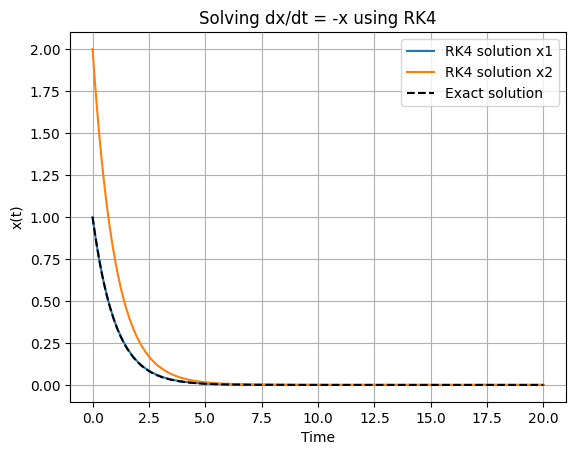

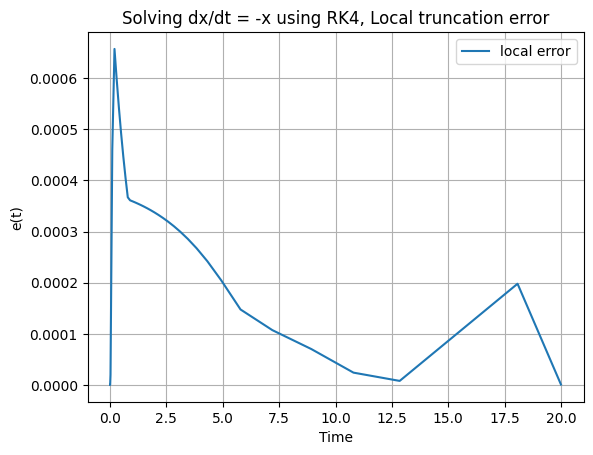

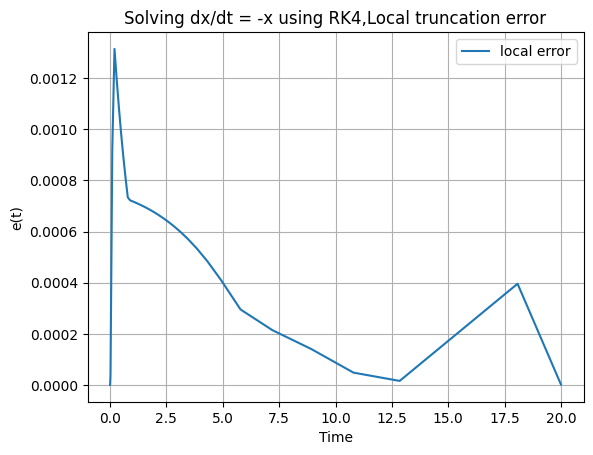

In [63]:
# Testing Runge kutta adaptive step size
# Example: dx/dt = lambda*x
def test_fun(t, x, lambda_):
    return lambda_*x

reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 20)
x0=np.array([1.0,2.0])

# Run the solver
Tout, Xout, E, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(test_fun,tspan,x0,h0,abstol,reltol,-1)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)


print(len(Tout))
print(len(E))

print(E)
# Plot the result
plt.plot(Tout, Xout[:, 0], label='RK4 solution x1')
plt.plot(Tout, Xout[:, 1], label='RK4 solution x2')

plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving dx/dt = -x using RK4')
plt.legend()
plt.grid()
plt.show()


# Plot the result
plt.plot(Tout, E[:,0], label='local error')
plt.xlabel('Time')
plt.ylabel('e(t)')
plt.title('Solving dx/dt = -x using RK4, Local truncation error')
plt.legend()
plt.grid()
plt.show()
# Plot the result
plt.plot(Tout, E[:,1], label='local error')
plt.xlabel('Time')
plt.ylabel('e(t)')
plt.title('Solving dx/dt = -x using RK4,Local truncation error')
plt.legend()
plt.grid()
plt.show()

Number of function calls 6792
Number of accepted steps 323
Number of rejected steps 243


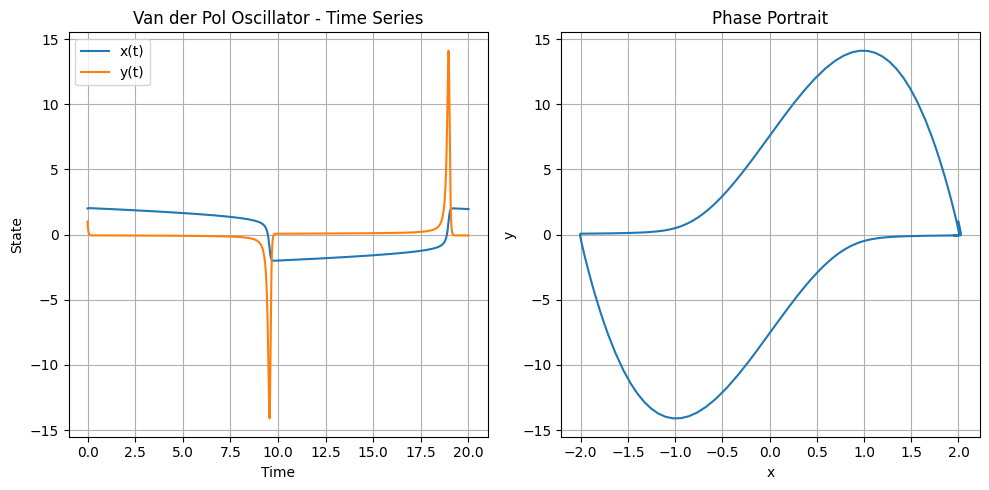

In [12]:
# Testing Runge kutta adaptive step size

reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 20)
x0=np.array([2.0,1.0])

# Run the solver
Tout, Xout, nfun, naccept, nreject = ClassicalRungeKuttaAdaptiveStep(vanderpol,tspan,x0,h0,abstol,reltol,10)

print("Number of function calls", nfun)
print("Number of accepted steps", naccept)
print("Number of rejected steps", nreject)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(Tout, Xout[:, 0], label='x(t)')
plt.plot(Tout, Xout[:, 1], label='y(t)')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Van der Pol Oscillator - Time Series')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Xout[:, 0], Xout[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.grid()

plt.tight_layout()
plt.show()

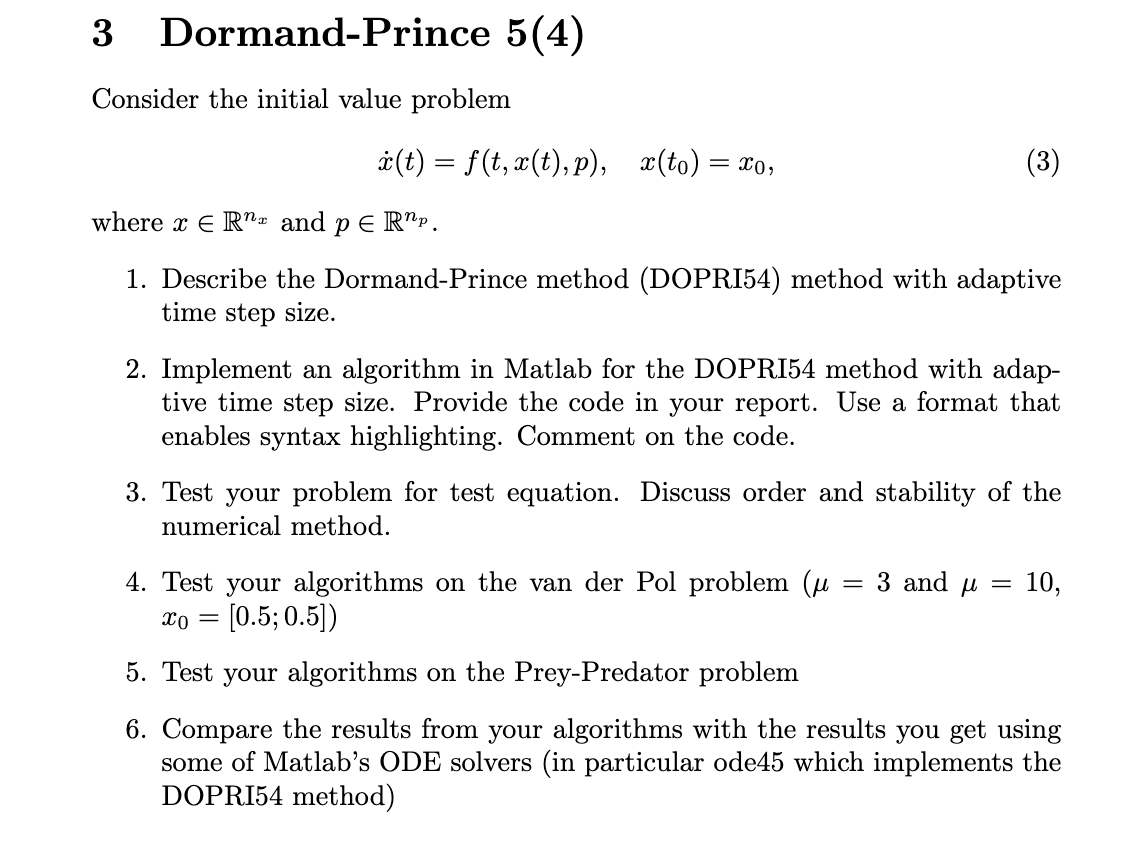

The picture below shows the DOPRI54 method 

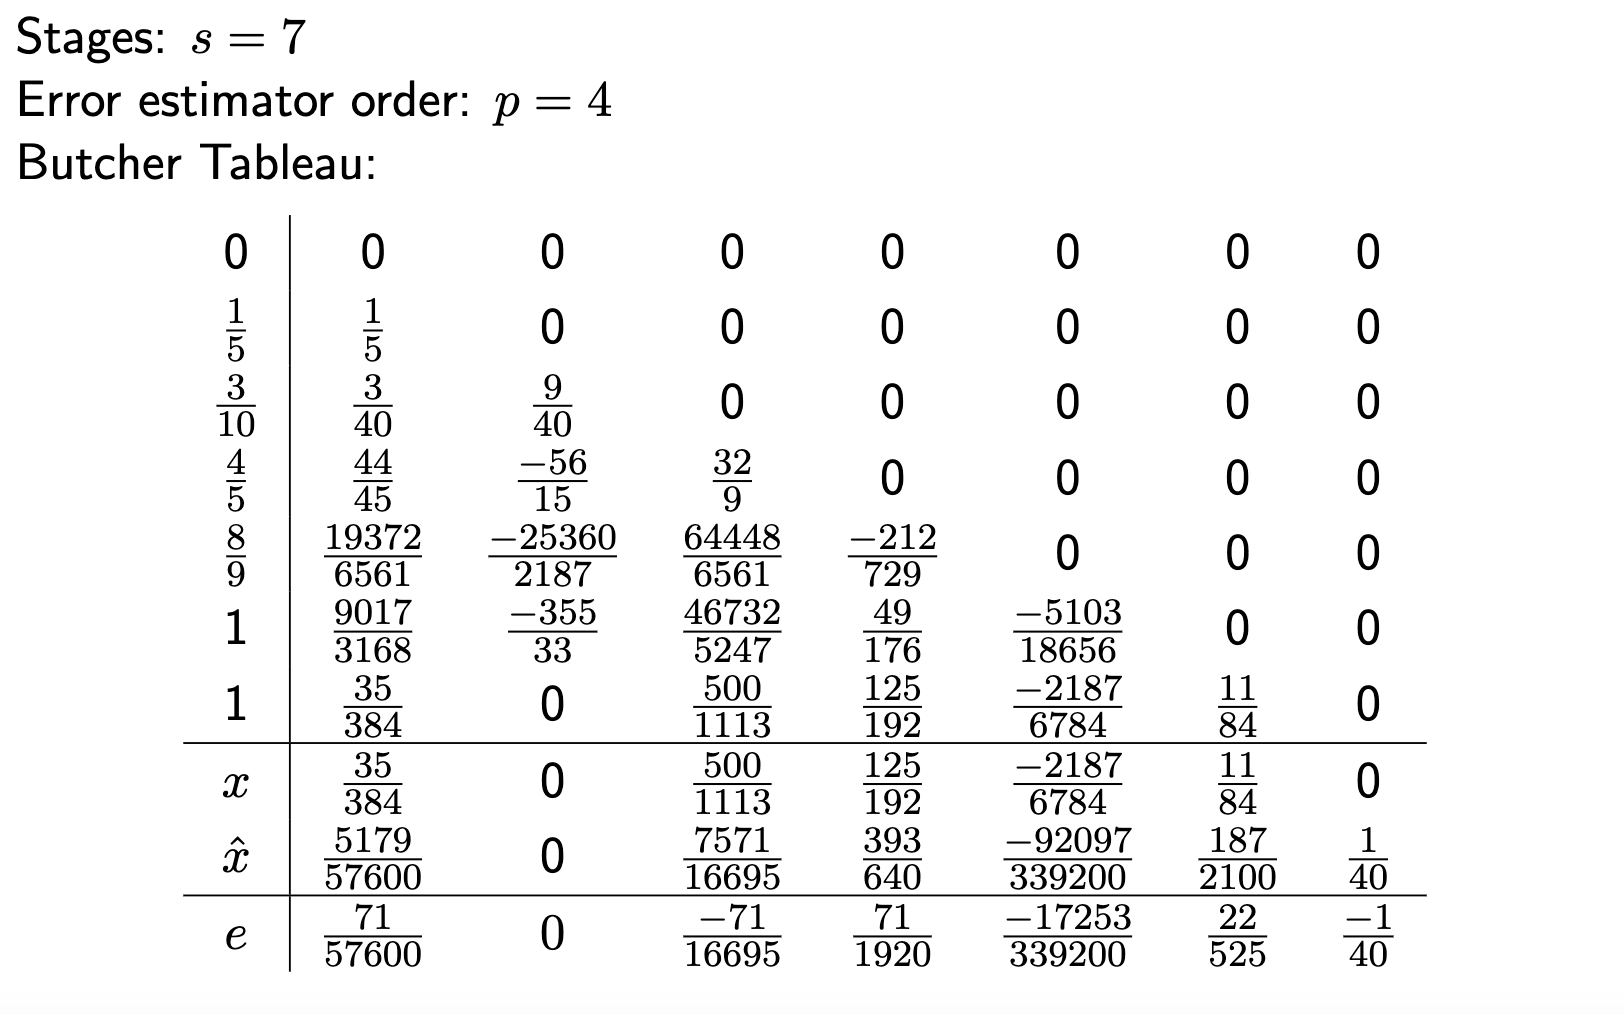

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Butcher tableau for classic RK4
A = np.array([
    [0,   0,   0, 0],
    [0.5, 0,   0, 0],
    [0,   0.5, 0, 0],
    [0,   0,   1, 0]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1.0])

# Initial conditions and settings
t0 = 0
x0 = [1.0]
h = 0.1
N = 100


# Run the solver
Tout, Xout = runge_kutta_fixed_step(f, t0, x0, h, N, A, b, c)

# Plot the result
plt.plot(Tout, Xout[:, 0], label='RK4 solution')
plt.plot(Tout, np.exp(-Tout), 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Solving dx/dt = -x using RK4')
plt.legend()
plt.grid()
plt.show()
